In [1063]:
import anndata as ad
import numpy as np
import os
import pandas as pd
import scanpy as sc

# Rebuild Adamson 2016 datasets using original files from GEO submission
source: https://ftp.ncbi.nlm.nih.gov/geo/series/GSE90nnn/GSE90546/suppl/GSE90546_RAW.tar

In [1064]:
os.chdir('/work/moccir/data/perturbseq_benchmark_data/adamson_upr_2016')

# UPR data

## mtx file

In [1065]:
# could probably use Scanpy's read_10x_mtx function but build it manually piece by piece instead
# .mtx file from GEO has a .txt extension but this will not cause any issues
upr_adata = ad.read_mtx('GSM2406681_10X010_matrix.mtx.txt')
upr_adata

AnnData object with n_obs × n_vars = 32738 × 65337

#### Matrix is currently genes (as observations) by cells (as variables), but we want cells as observations so transpose

In [1066]:
upr_adata = upr_adata.T

## genes

In [1067]:
upr_genes = pd.read_csv('GSM2406681_10X010_genes.tsv', sep='\t', names=['ensembl_id', 'gene_symbol'])
upr_genes

,ensembl_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
32733,ENSG00000215635,AC145205.1
32734,ENSG00000268590,BAGE5
32735,ENSG00000251180,CU459201.1
32736,ENSG00000215616,AC002321.2


## cell barcodes

In [1068]:
upr_barcodes = pd.read_csv('GSM2406681_10X010_barcodes.tsv', sep='\t', header=None, index_col=0)
upr_barcodes.index.name = 'barcode'
upr_barcodes

""
barcode
AAACATACAAGATG-1
AAACATACACCTAG-1
AAACATACTTCCCG-1
AAACATTGAAACAG-1
AAACATTGCAGCTA-1
...
TTTGCATGCTTTAC-10
TTTGCATGGAGGAC-10
TTTGCATGTAGAGA-10


### add obs_names and var_names

In [1069]:
upr_adata.obs_names = upr_barcodes.index
upr_adata.var_names = upr_genes.index

### prepare cell identities data and add 'condition' column

In [1070]:
upr_cell_identities = pd.read_csv('GSM2406681_10X010_cell_identities.csv', index_col=0)
upr_cell_identities.index.name = 'barcode'
# remove whitespace in column names
upr_cell_identities.columns = [col.replace(' ', '_') for col in upr_cell_identities.columns]
upr_cell_identities

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells
barcode,,,,,,
TAATGTGAACTGGT-6,IARS2_pDS090,46452,1557,29.834297,True,1
GAAGATGATCTTCA-3,SPCS3_pDS402,25637,1090,23.520183,True,1
GCGTAAACAGTCGT-2,CHERP_pDS024,21083,817,25.805386,True,1
TTCGTATGCTTTAC-5,SLMO2_pDS433,20760,756,27.460317,True,1
AACTTGCTAACTGC-10,XRN1_pDS411,19604,824,23.791262,True,1
...,...,...,...,...,...,...
CGCAGGACTATCTC-9,YIPF5_pDS226,1,1,1.000000,False,0
CGCAGGACTGCAGT-10,PSMD12_pDS008,1,1,1.000000,False,0
CGACCTACACTGGT-8,63(mod)_pBA580,1,1,1.000000,False,0


In [1071]:
upr_cell_identities['condition'] = upr_cell_identities['guide_identity'].apply(lambda s: s.split('_')[0])
upr_cell_identities['condition'] = upr_cell_identities['condition'].replace('62(mod)', 'control')
upr_cell_identities['condition'] = upr_cell_identities['condition'].replace('63(mod)', 'control')
upr_cell_identities

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
TAATGTGAACTGGT-6,IARS2_pDS090,46452,1557,29.834297,True,1,IARS2
GAAGATGATCTTCA-3,SPCS3_pDS402,25637,1090,23.520183,True,1,SPCS3
GCGTAAACAGTCGT-2,CHERP_pDS024,21083,817,25.805386,True,1,CHERP
TTCGTATGCTTTAC-5,SLMO2_pDS433,20760,756,27.460317,True,1,SLMO2
AACTTGCTAACTGC-10,XRN1_pDS411,19604,824,23.791262,True,1,XRN1
...,...,...,...,...,...,...,...
CGCAGGACTATCTC-9,YIPF5_pDS226,1,1,1.000000,False,0,YIPF5
CGCAGGACTGCAGT-10,PSMD12_pDS008,1,1,1.000000,False,0,PSMD12
CGACCTACACTGGT-8,63(mod)_pBA580,1,1,1.000000,False,0,control


### some rows in mtx file do not have entries in cell identities -- create rows with missing information for these so that it can be added as .obs

In [1072]:
upr_cell_identities_list = upr_cell_identities.index.tolist()
upr_missing_barcodes = [x for x in upr_adata.obs_names if x not in upr_cell_identities_list]
len(upr_missing_barcodes)

80

In [1073]:
upr_missing_obs = pd.DataFrame({
    'guide_identity': None,
    'read_count': np.nan,
    'UMI_count': np.nan,
    'coverage': np.nan,
    'good_coverage': False,
    'number_of_cells': np.nan,
    'condition': np.nan
}, index=upr_missing_barcodes)

### add .obs and .var

In [1074]:
new_upr_obs = pd.concat([upr_cell_identities, upr_missing_obs])
new_upr_obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
TAATGTGAACTGGT-6,IARS2_pDS090,46452.0,1557.0,29.834297,True,1.0,IARS2
GAAGATGATCTTCA-3,SPCS3_pDS402,25637.0,1090.0,23.520183,True,1.0,SPCS3
GCGTAAACAGTCGT-2,CHERP_pDS024,21083.0,817.0,25.805386,True,1.0,CHERP
TTCGTATGCTTTAC-5,SLMO2_pDS433,20760.0,756.0,27.460317,True,1.0,SLMO2
AACTTGCTAACTGC-10,XRN1_pDS411,19604.0,824.0,23.791262,True,1.0,XRN1
...,...,...,...,...,...,...,...
GAGGATCTCGAATC-10,None,NaN,NaN,NaN,False,NaN,NaN
GGGTTATGAACCTG-10,None,NaN,NaN,NaN,False,NaN,NaN
GTGAGGGATCAAGC-10,None,NaN,NaN,NaN,False,NaN,NaN
TACGGCCTGCAGTT-10,None,NaN,NaN,NaN,False,NaN,NaN


#### To ensure that the new .obs is in the correct order to match the entries in .X, need to reorded it by existing .obs index in the AnnData object that has been created prior to substituting it in.

In [1075]:
new_upr_obs = new_upr_obs.reindex(upr_adata.obs.index)
upr_adata.obs = new_upr_obs

In [1076]:
upr_adata.obs

,guide_identity,read_count,UMI_count,coverage,good_coverage,number_of_cells,condition
barcode,,,,,,,
AAACATACAAGATG-1,63(mod)_pBA580,282.0,8.0,35.250000,True,1.0,control
AAACATACACCTAG-1,OST4_pDS353,331.0,7.0,47.285714,True,1.0,OST4
AAACATACTTCCCG-1,SEC61A1_pDS031,285.0,10.0,28.500000,True,1.0,SEC61A1
AAACATTGAAACAG-1,EIF2B4_pDS491,1036.0,30.0,34.533333,True,1.0,EIF2B4
AAACATTGCAGCTA-1,SRPR_pDS482,863.0,25.0,34.520000,True,1.0,SRPR
...,...,...,...,...,...,...,...
TTTGCATGCTTTAC-10,STT3A_pDS011,476.0,17.0,28.000000,True,1.0,STT3A
TTTGCATGGAGGAC-10,ARHGAP22_pDS458,539.0,19.0,28.368421,True,1.0,ARHGAP22
TTTGCATGTAGAGA-10,63(mod)_pBA580,647.0,35.0,18.485714,True,1.0,control


In [1077]:
upr_adata.var = upr_genes

In [1078]:
upr_adata.var

,ensembl_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
32733,ENSG00000215635,AC145205.1
32734,ENSG00000268590,BAGE5
32735,ENSG00000251180,CU459201.1
32736,ENSG00000215616,AC002321.2


## add basic QC metrics

In [1079]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
upr_adata.var["mt"] = upr_adata.var['gene_symbol'].str.startswith("MT-")
# ribosomal genes
upr_adata.var["ribo"] = upr_adata.var['gene_symbol'].str.startswith(("RPS", "RPL"))
# hemoglobin genes
upr_adata.var["hb"] = upr_adata.var['gene_symbol'].str.contains("^HB[^(P)]")

In [1080]:
sc.pp.calculate_qc_metrics(
    upr_adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

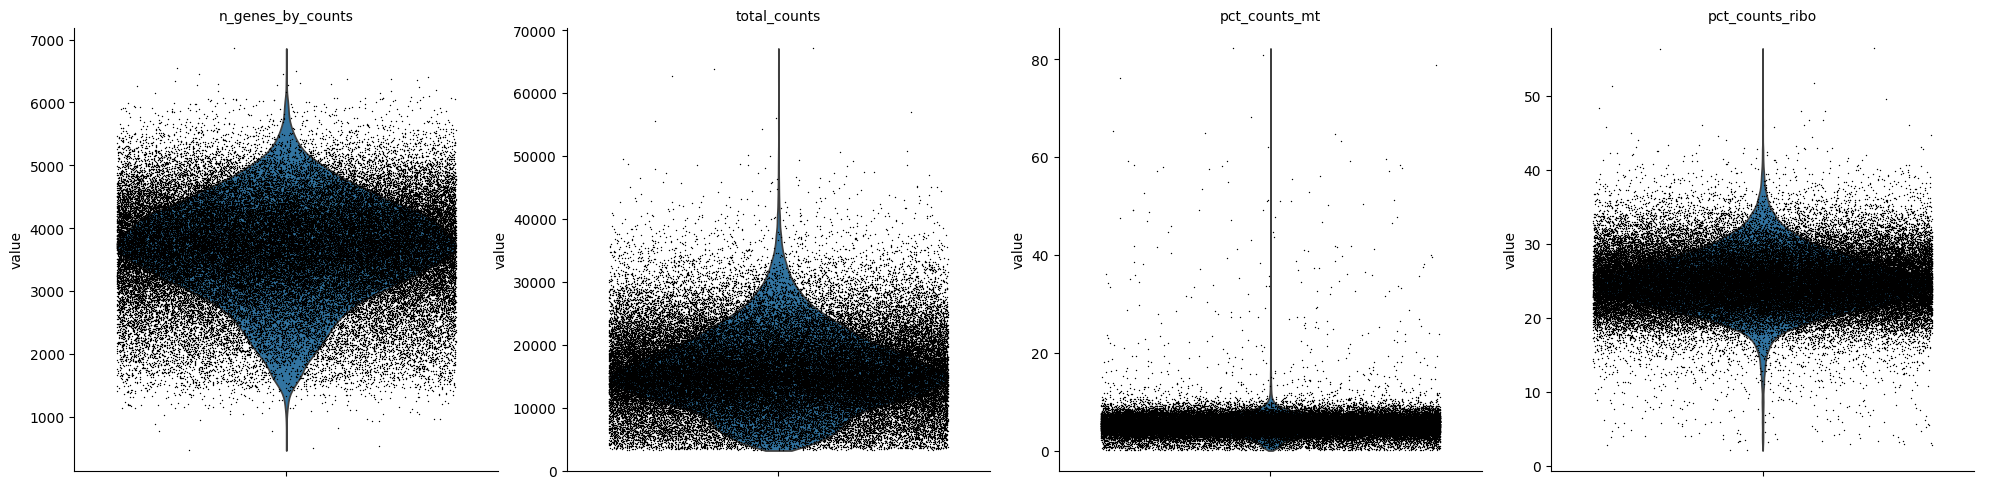

In [1081]:
sc.pl.violin(
    upr_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)

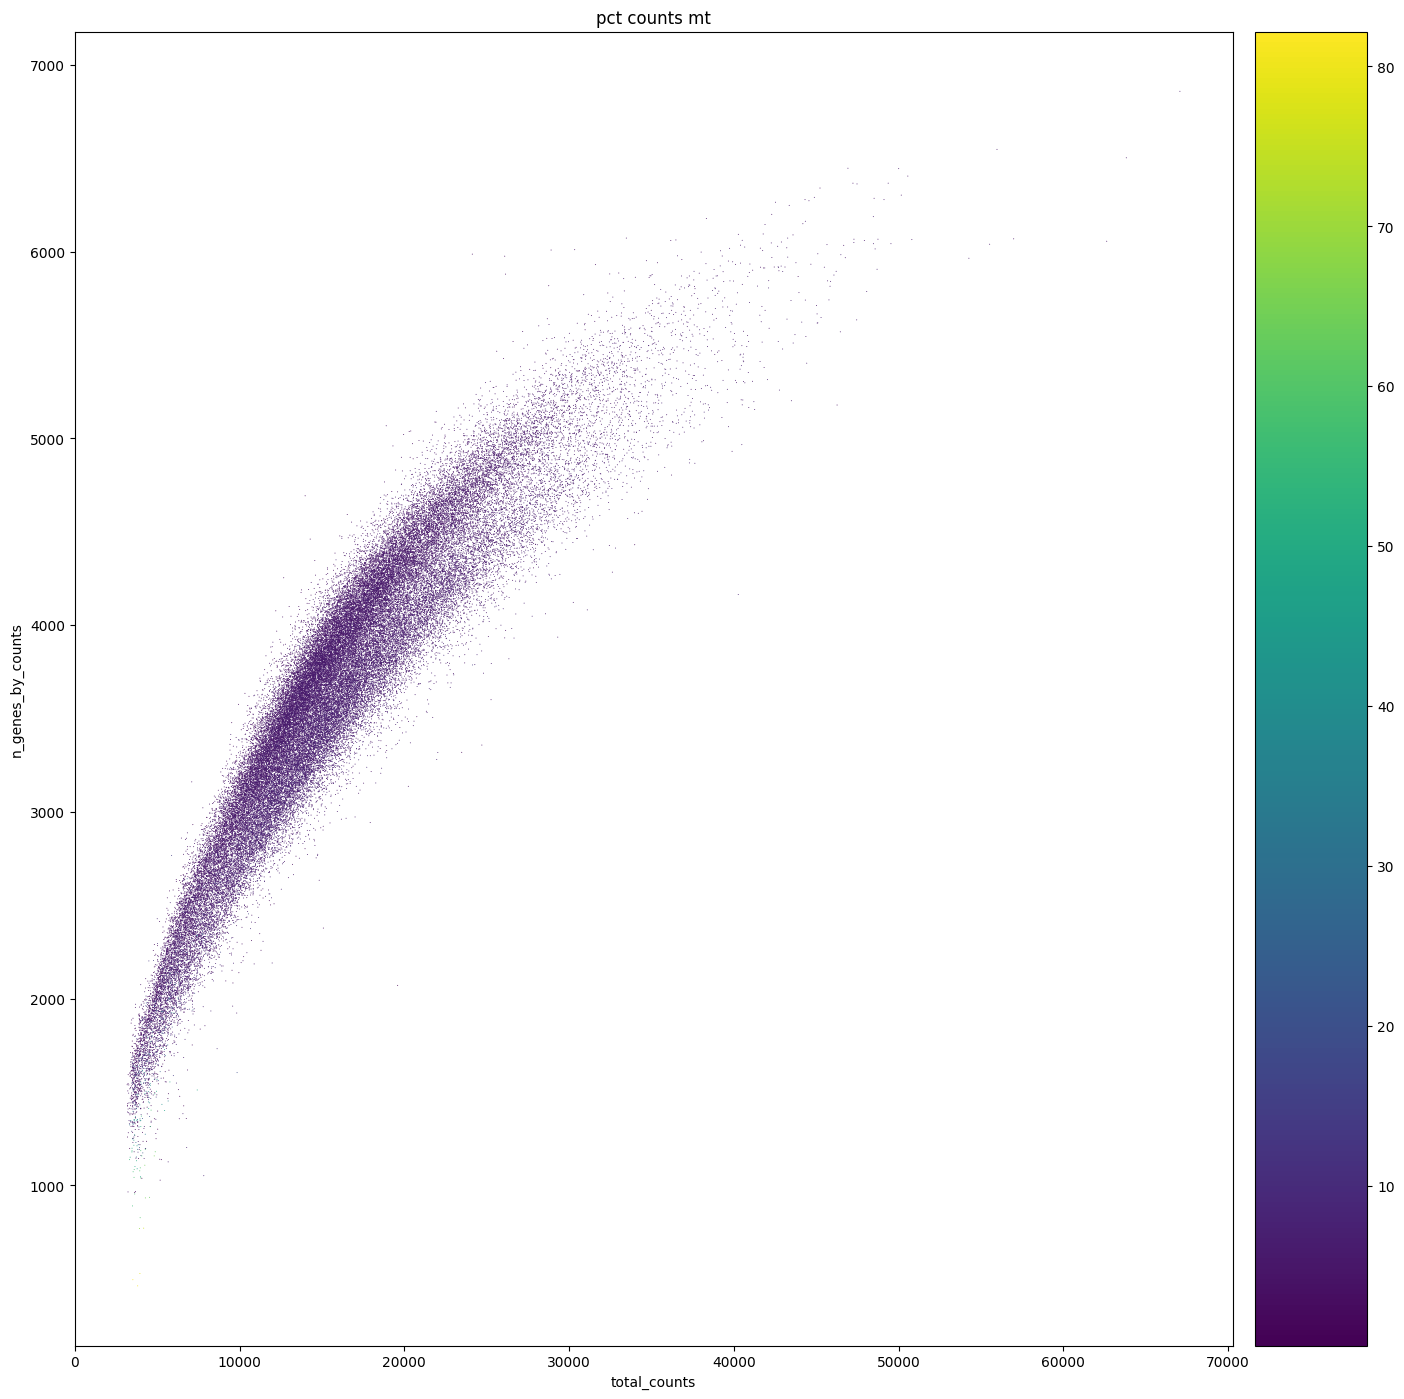

In [1082]:
sc.pl.scatter(upr_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

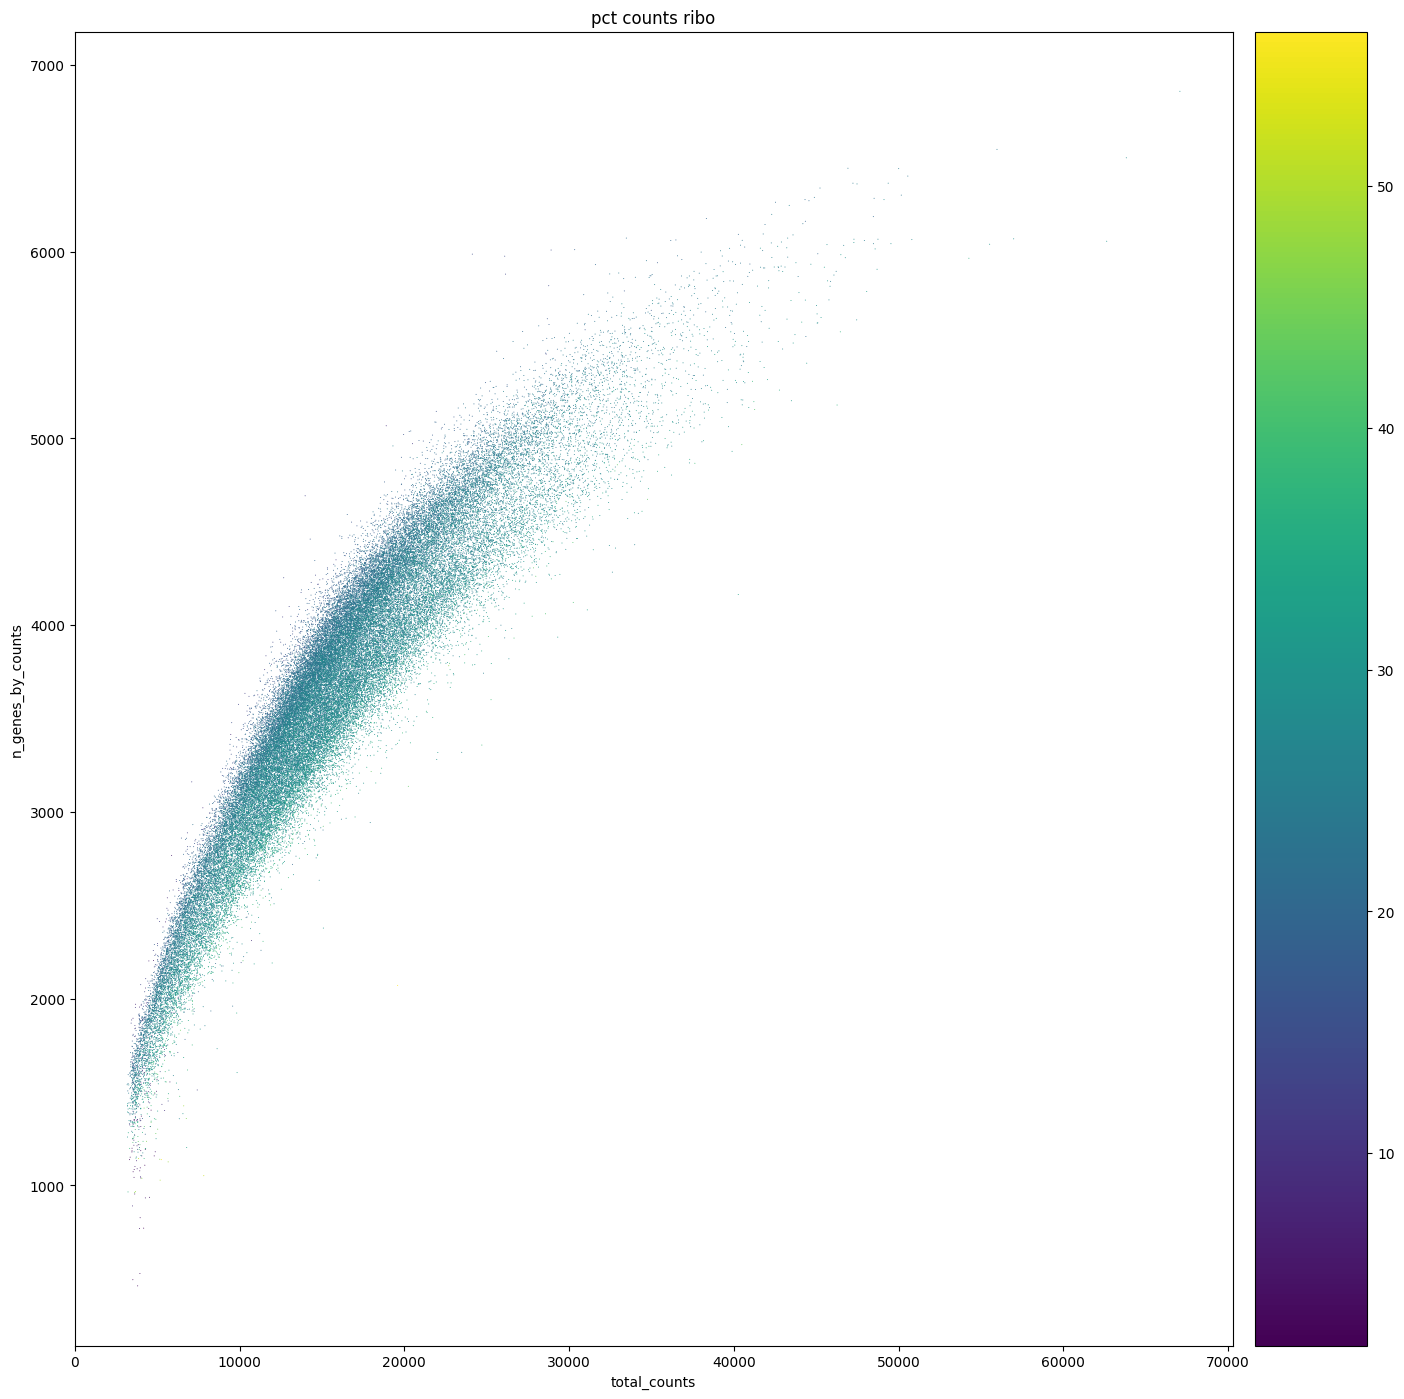

In [1083]:
sc.pl.scatter(upr_adata, "total_counts", "n_genes_by_counts", color="pct_counts_ribo")

In [1084]:
upr_adata

AnnData object with n_obs × n_vars = 65337 × 32738
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'good_coverage', 'number_of_cells', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'ensembl_id', 'gene_symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [1085]:
upr_adata.obs['condition'].value_counts()

condition
control    6286
IER3IP1    1912
ASCC3      1824
SEC61B     1760
DNAJC19    1588
           ... 
XBP1         66
PSMD12       63
PSMA1        30
C7orf26      14
ATF6         11
Name: count, Length: 93, dtype: int64

In [1086]:
upr_adata.write('adamson_2016_upr_from_source.h5ad')